In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tqdm import tqdm

In [2]:
def fp_list_from_smiles_list(smiles_list,n_bits=2048):
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        fp_list.append(fp_as_array(mol,n_bits))
    return fp_list

def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

In [3]:
smiles_train = pd.read_csv("ligand_CHEMBL240_train_splityear=2015.csv", usecols=['smiles'])
smiles_test = pd.read_csv("ligand_CHEMBL240_test_splityear=2015.csv", usecols=['smiles'])

In [4]:
smiles_train['train'] = 1
smiles_test['train'] = 0

In [5]:
smiles_list = pd.concat([smiles_train, smiles_test])

In [6]:
fp_list = fp_list_from_smiles_list(smiles_list.smiles)

  0%|                                                                                                                                                              | 0/8637 [00:00<?, ?it/s]/tmp/ipykernel_118220/1709034738.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = np.zeros((1,), np.int)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8637/8637 [00:02<00:00, 3882.60it/s]


In [7]:
pca = PCA(n_components=50)
crds = pca.fit_transform(fp_list)

In [8]:
%time crds_embedded = TSNE(n_components=2).fit_transform(crds)

/home/julius/miniconda3/envs/rxt-dev/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/julius/miniconda3/envs/rxt-dev/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 2min 40s, sys: 1.35 s, total: 2min 42s
Wall time: 14 s


In [9]:
tsne_df = pd.DataFrame(crds_embedded, columns=["X", "Y"])

In [10]:
tsne_df['train'] = smiles_list['train'].reset_index(drop=True)

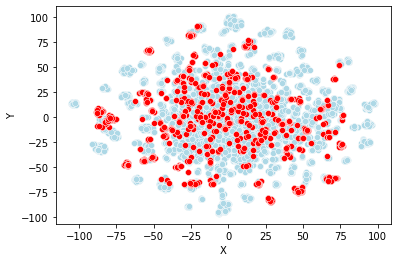

In [11]:
ax = sns.scatterplot(data=tsne_df.query("train == 1"),x="X",y="Y",color='lightblue')
ax = sns.scatterplot(data=tsne_df.query("train == 0"),x="X",y="Y",color='red')